<a href="https://colab.research.google.com/github/abhijadhav14/Deep-Learning-CSE5019/blob/main/DL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [15]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train), to_categorical(y_test)

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [22]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - accuracy: 0.3424 - loss: 1.8144 - val_accuracy: 0.5027 - val_loss: 1.4095
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.5468 - loss: 1.2745 - val_accuracy: 0.5881 - val_loss: 1.1571
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - accuracy: 0.6126 - loss: 1.1009 - val_accuracy: 0.6141 - val_loss: 1.1006
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6557 - loss: 0.9913 - val_accuracy: 0.6540 - val_loss: 0.9930
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 72ms/step - accuracy: 0.6893 - loss: 0.8966 - val_accuracy: 0.6648 - val_loss: 0.9763
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.7151 - loss: 0.8236 - val_accuracy: 0.6512 - val_loss: 1.0119
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 95ms/step - accuracy: 0.7360 - loss: 0.7582 - val_accuracy: 0.6784 - val_loss: 0.9467
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.7553 - loss: 0.7154 - 

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test accuracy: ", test_acc * 100, " %")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6778 - loss: 0.9742
Test accuracy:  67.8600013256073  %


In [25]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [26]:
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


 Classification Report:
              precision    recall  f1-score   support

    airplane       0.62      0.76      0.68      1000
  automobile       0.78      0.82      0.80      1000
        bird       0.57      0.62      0.59      1000
         cat       0.55      0.46      0.50      1000
        deer       0.71      0.53      0.61      1000
         dog       0.59      0.59      0.59      1000
        frog       0.77      0.75      0.76      1000
       horse       0.80      0.68      0.74      1000
        ship       0.70      0.83      0.76      1000
       truck       0.73      0.74      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



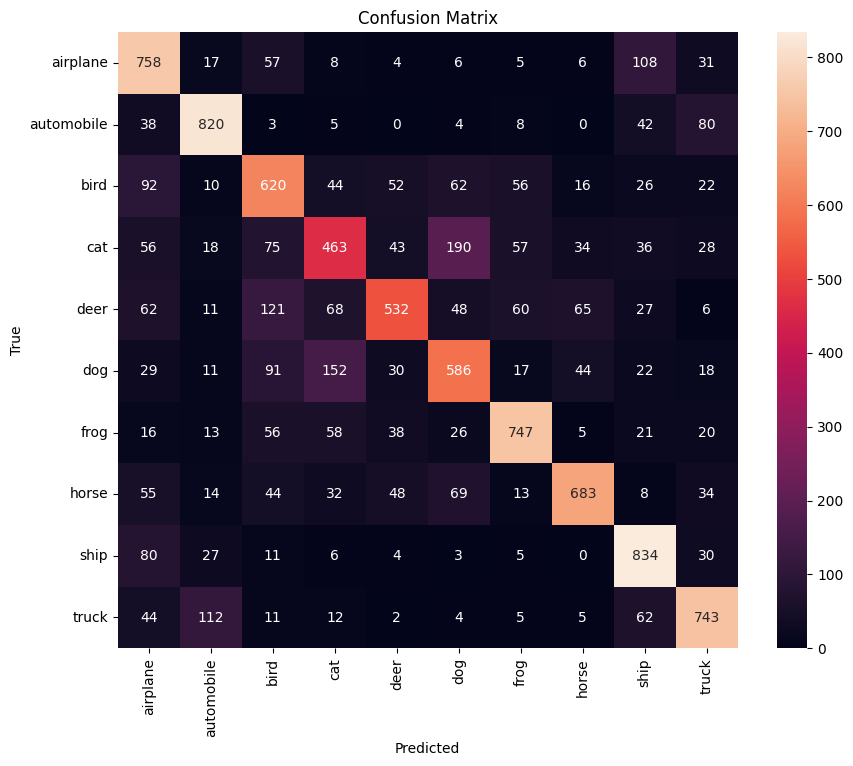

In [27]:
import seaborn as sns
import pandas as pd
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

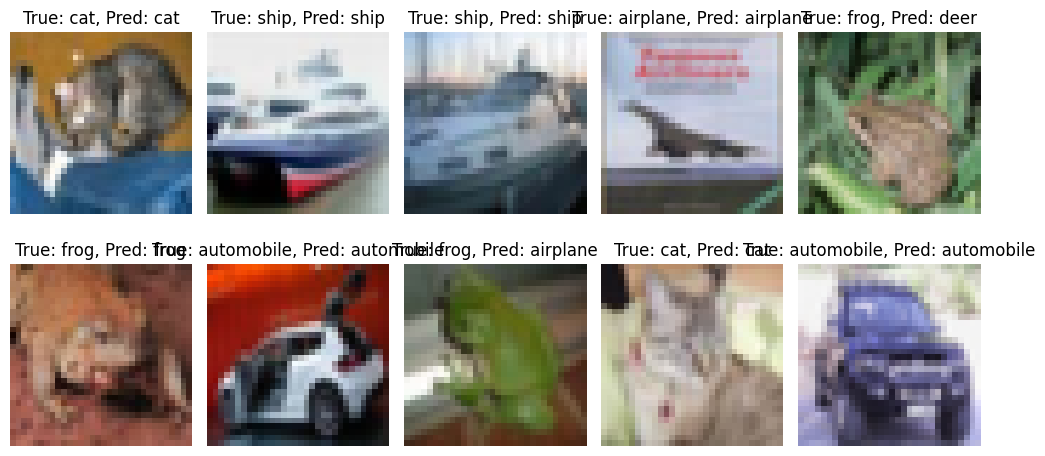

In [28]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i])
  plt.title(f"True: {class_names[y_true[i]]}, Pred: {class_names[y_pred[i]]}")
  plt.axis('off')
plt.tight_layout()
plt.show()